In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import colors

from neutronMS import MS_sim, GEN_constQgeom

In [7]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Using the neutronMS library

In [8]:
geom = ('cuboid', 1.2, 5, 7)

kf=6

mus=(0.64, 0)
#S_files = ('./data_Sq/Sqw_vanadium/S_mesh.npy', './data_Sq/Sqw_vanadium/Q_vec.npy', './data_Sq/Sqw_vanadium/omega_vec.npy')
S_files = ('./data_Sq/Sqw_D2O/Sqw_D2O_300K.npy', './data_Sq/Sqw_D2O/Q_vec.npy', './data_Sq/Sqw_D2O/omega_vec.npy')

## Single point in $(Q, \omega)$ space

In [9]:
ki=5

theta=np.deg2rad(1)

In [10]:
sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
print('Q = ', sim.Q)
print('omega = ', sim.omega)
sim.run(N=100000, B=20)
print(sim.Im/sim.Is)

Q =  1.0045587541883896
omega =  -22.792200260343876
1.8296826326998457


Text(0.5, 0, '$\\theta_{2m}$ [rad]')

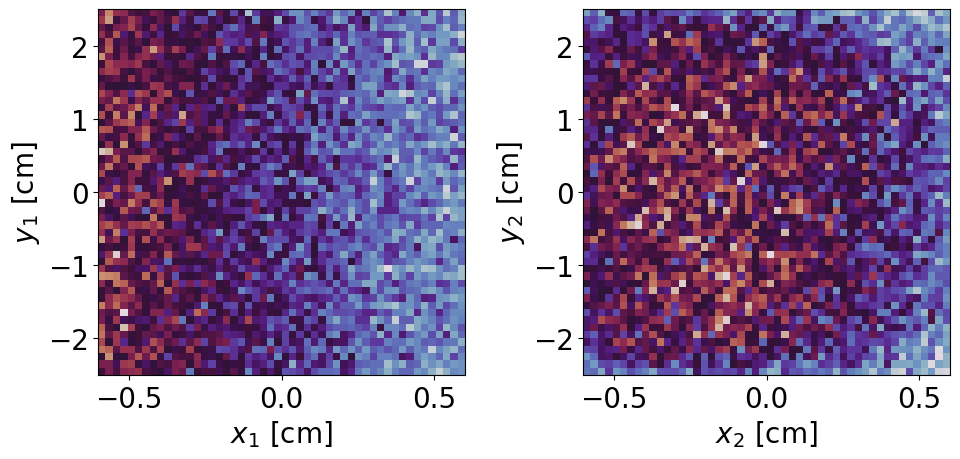

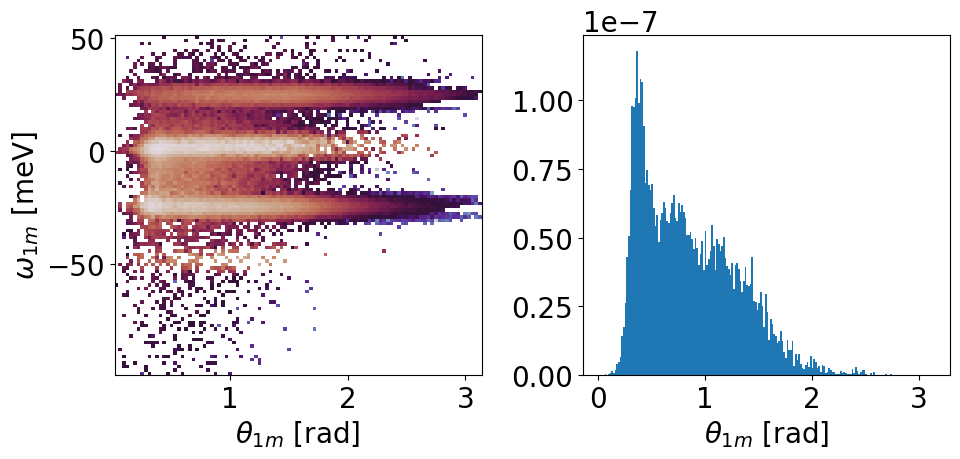

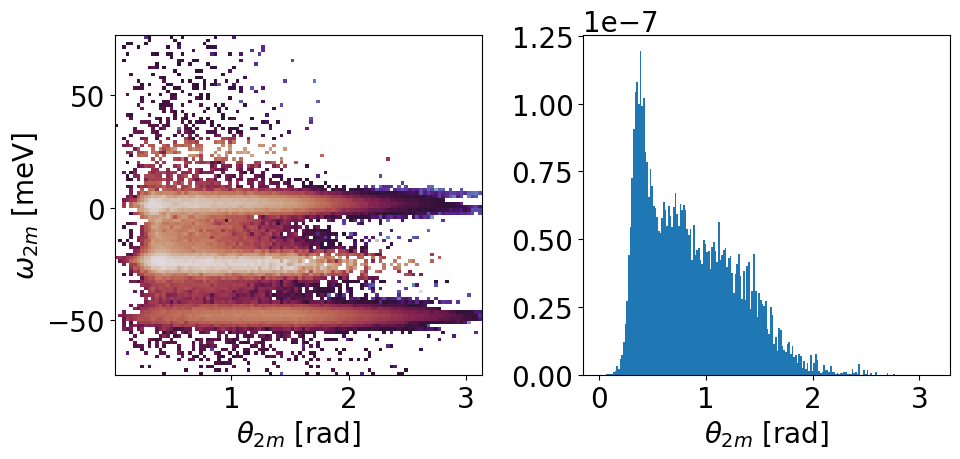

In [11]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))
axs[0].hist2d(sim.p1[:,0], sim.p1[:,1], bins=50, weights=sim.w1, cmap='twilight')
axs[0].set_xlabel(r'$x_1$ [cm]')
axs[0].set_ylabel(r'$y_1$ [cm]')
axs[1].hist2d(sim.p2[:,0], sim.p2[:,1], bins=50, weights=sim.w2, cmap='twilight')
axs[1].set_xlabel(r'$x_2$ [cm]')
axs[1].set_ylabel(r'$y_2$ [cm]')


fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))
axs[0].hist2d(sim.theta1m, sim.omega1m, weights=sim.wfm, norm='log', bins=100, cmap='twilight');
axs[0].set_xlabel(r'$\theta_{1m}$ [rad]')
axs[0].set_ylabel(r'$\omega_{1m}$ [meV]')
axs[1].hist(sim.theta1m, weights=sim.wfm, bins=200)
axs[1].set_xlabel(r'$\theta_{1m}$ [rad]')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))
axs[0].hist2d(sim.theta2m, sim.omega2m, weights=sim.wfm, norm='log', bins=100, cmap='twilight');
axs[0].set_xlabel(r'$\theta_{2m}$ [rad]')
axs[0].set_ylabel(r'$\omega_{2m}$ [meV]')
axs[1].hist(sim.theta2m, weights=sim.wfm, bins=200)
axs[1].set_xlabel(r'$\theta_{2m}$ [rad]')

## Energy spectrum

In [12]:
######################################
omega = np.arange(-30, 30, .5)
Q = .5
######################################

data = GEN_constQgeom('inverse', kf, Q, omega)
data = data[~np.isnan(data).any(axis=1)]

In [15]:
for i in data.index:
    print('running omega = ', data.omega.loc[i])
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=1000000, B=20)
    data.loc[i,'Is'] = sim.Is
    data.loc[i,'Im'] = sim.Im

running omega =  -11.5
running omega =  -11.0
running omega =  -10.5
running omega =  -10.0
running omega =  -9.5
running omega =  -9.0
running omega =  -8.5
running omega =  -8.0
running omega =  -7.5
running omega =  -7.0
running omega =  -6.5
running omega =  -6.0
running omega =  -5.5
running omega =  -5.0
running omega =  -4.5
running omega =  -4.0
running omega =  -3.5
running omega =  -3.0
running omega =  -2.5
running omega =  -2.0
running omega =  -1.5
running omega =  -1.0
running omega =  -0.5
running omega =  0.0
running omega =  0.5
running omega =  1.0
running omega =  1.5
running omega =  2.0
running omega =  2.5
running omega =  3.0
running omega =  3.5
running omega =  4.0
running omega =  4.5
running omega =  5.0
running omega =  5.5
running omega =  6.0
running omega =  6.5
running omega =  7.0
running omega =  7.5
running omega =  8.0
running omega =  8.5
running omega =  9.0
running omega =  9.5
running omega =  10.0
running omega =  10.5
running omega =  11.0
runn

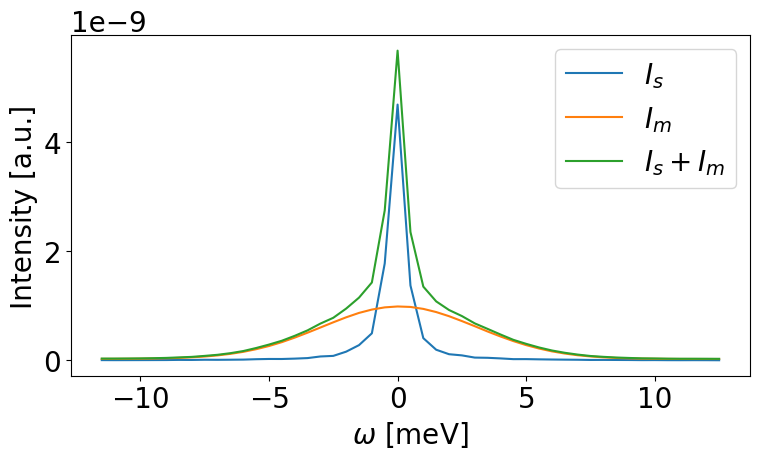

In [18]:
plt.figure(figsize=(8,5), tight_layout=True)
plt.plot(data.omega, data.Is, label='$I_s$')
plt.plot(data.omega, data.Im, label='$I_m$')
plt.plot(data.omega, data.Is+data.Im, label='$I_s+I_m$')

#plt.yscale('log')

plt.xlabel(r'$\omega$ [meV]')
plt.ylabel('Intensity [a.u.]')
plt.legend()


plt.savefig('./figures4article/MS_spectra_I_Q={}.png'.format(Q), dpi=300)

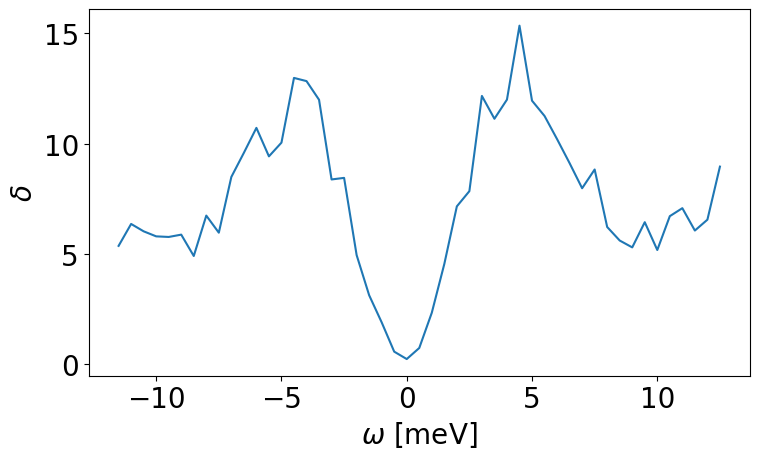

In [17]:
plt.figure(figsize=(8,5), tight_layout=True)
plt.plot(data.omega, data.Im/data.Is)

#plt.yscale('log')

plt.xlabel(r'$\omega$ [meV]')
plt.ylabel(r'$\delta$')


plt.savefig('./figures4article/MS_spectra_delta_Q={}.png'.format(Q), dpi=300)